# Tópicos en Análisis de Estabilidad Lineal

In [124]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Regiones de estabilidad más comunes para estudiar

In [197]:
# Plot of many regions!
l1, l2 = -3.5, 3.5
resolution = 0.01
[X, Y] = np.meshgrid(np.arange(-l2,l2,resolution), np.arange(-l2,l2,resolution))
Z = X + 1j*Y

def plot_complex_region(R, ax, title, cmap=plt.cm.gray, levels=np.linspace(0, 1, 20)):
    ax.set_title(title, fontsize=16)
    ax.axis("equal")
    ax.arrow(0, l1, 0, 2*l2-0.15, head_width=0.10, head_length=0.10, fc='k', ec='k', alpha=1.0, lw=0.5)
    ax.arrow(l1, 0, 2*l2-0.15, 0, head_width=0.10, head_length=0.10, fc='k', ec='k', alpha=1.0, lw=0.5)
    ax.contourf(X, Y, R, cmap=cmap, levels=levels, origin='lower', antialiased=True)
    ax.grid(True)
    ax.set_xlabel(r"$\Re(z)$", fontsize=20)
    ax.set_ylabel(r"$\Im(z)$", fontsize=20)
    ax.spines["bottom"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)

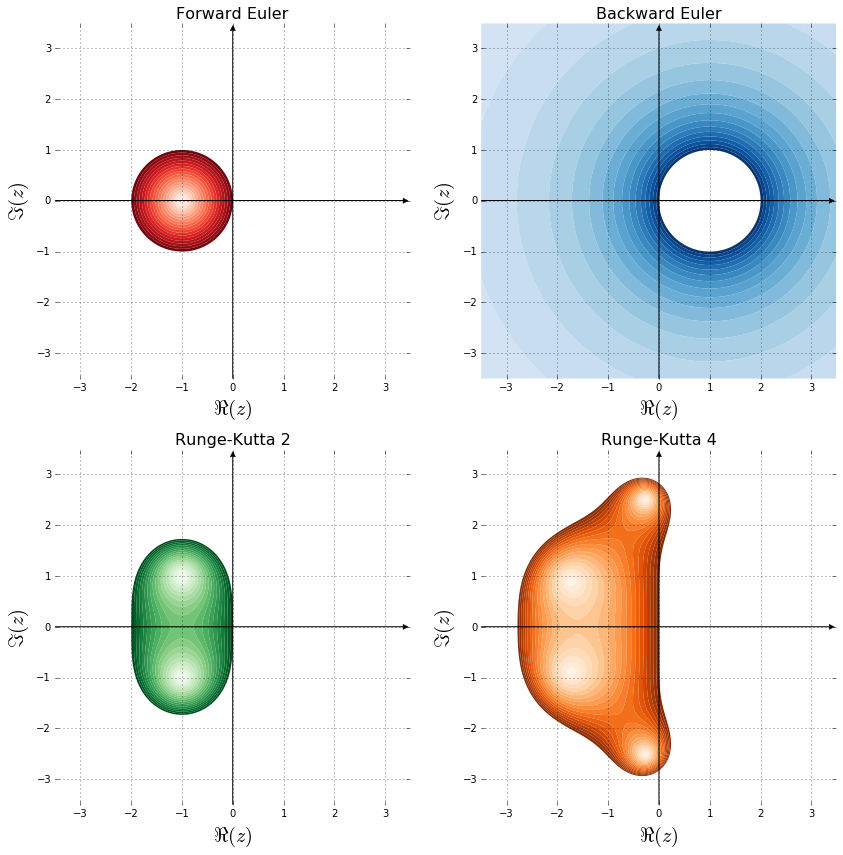

In [206]:
regions = []
# Euler stability region
R = 1 + Z
regions.append(np.abs(R))
# Backward Euler stability region
R = 1/(1-Z)
regions.append(np.abs(R))
# RK2 stability region
R = 1 + Z + Z**2/2
regions.append(np.abs(R))
# RK4 stability region
R = 1 + Z + Z**2/2 + Z**3/6 + Z**4/24
regions.append(np.abs(R))

f, axarr = plt.subplots(2, 2, figsize=(14,14))
plot_complex_region(regions[0], axarr[0,0], "Forward Euler", plt.cm.Reds)
plot_complex_region(regions[1], axarr[0,1], "Backward Euler", plt.cm.Blues)
plot_complex_region(regions[2], axarr[1,0], "Runge-Kutta 2", plt.cm.Greens)
plot_complex_region(regions[3], axarr[1,1], "Runge-Kutta 4", plt.cm.Oranges)
plt.savefig("stability_regions.pdf")
plt.show()

## Quiz 3

1) Considere el siguiente IVP lineal:

$$\dot{y}(t) = \lambda y(t), \quad \quad y(0) = 1$$

Encuentre la región de estabilidad para el método de *Forward Euler* cuando $\Re(\lambda) > 0$.

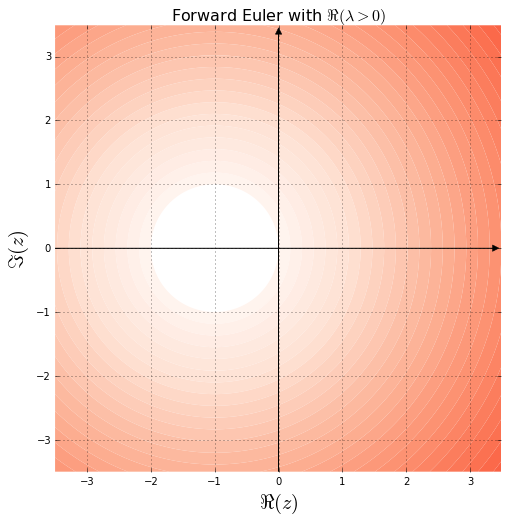

In [211]:
levels = np.linspace(1, 10, 50)
f, axarr = plt.subplots(1, 1, figsize=(8,8))
plot_complex_region(regions[0], axarr, "Forward Euler with $\Re(\lambda > 0)$", plt.cm.Reds, levels=levels)

2) Aplique el método de *Forward Euler* para resolver el IVP hasta el tiempo $t = 1.2$ para $h_1 = 0.1$ y $h_2 = 0.4$. Considere $\lambda = -5$. Grafique sus resultados versus la curva analítica $y(t)$ utilizando marcadores únicos por cada experimento (por ejemplo use $\bullet$ para $h_1$ y $\triangle$ para $h_2$). ¿Cómo explica el comportamiento observado?

In [240]:
# Forward Euler Method
def euler_ode(y,t,f,h):
    return y+h*f(t,y)

Stability region for lambda = -5: h in [1e-16,0.4]


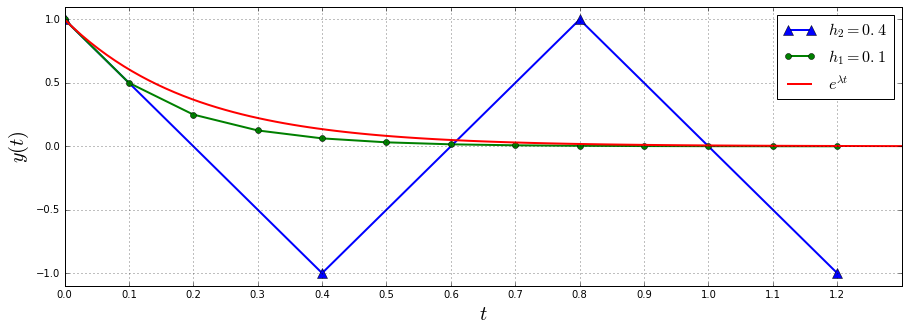

In [241]:
#lambda
l = -5
# stability range
hmin = 1e-16
hmax = -2.0/l
print("Stability region for lambda = {}: h in [{},{}]".format(l, hmin, hmax))

# Right hand side of ODE, f(t,y)
def f(t, y):
    return l*y

#Analytical solution
def y(t):
    return np.exp(l*t)

# Global parameters
T = 1.3
tt = np.linspace(0, T, 100)
plt.figure(figsize=(15,5))

# Using hmax
h = hmax
t_times = np.arange(0, T, h)
y_output = np.zeros(t_times.size)
y_output[0] = 1
for i in range(1,t_times.size):
    y_output[i] = euler_ode(y_output[i-1], t_times[i-1], f, h)
plt.plot(t_times, y_output, 'b^-', lw=2.0, label=r"$h_2="+str(h)+"$", markersize=10)
# Using h inside region
h = 0.1
t_times = np.arange(0, T, h)
y_output = np.zeros(t_times.size)
y_output[0] = 1
for i in range(1,t_times.size):
    y_output[i] = euler_ode(y_output[i-1], t_times[i-1], f, h)
plt.plot(t_times, y_output, 'go-', lw=2.0, label=r"$h_1="+str(h)+"$")

# Analytical solution
yy = y(tt)
plt.plot(tt, yy, 'r-', lw=2.0, label=r"$e^{\lambda t}$")

# a little rect for axis
plt.xlim(0, T)
plt.ylim(-1.1,1.1)
plt.grid(True)
plt.xticks(np.arange(0,T,h))
plt.xlabel(r"$t$", fontsize=20)
plt.ylabel(r"$y(t)$", fontsize=20)
plt.legend(loc='best', fontsize=16)
#plt.savefig("linear.pdf")
plt.show()

3) El método de *Backward Euler* hace uso del extremo derecho del intervalo de estimación de $y'(t)$, lo que genera una forma implícita para estimar $y_{i+1}$ bajo la siguiente fórmula:
	$$y_{i+1} = y_i + hf\left(t_{i+1}, y_{i+1}\right)$$
Calcule y dibuje la región de estabilidad del método *Backward Euler*.

Ver gráfico original!

4) Calcule y dibuje la región de estabilidad del método *Backward Euler* cuando la solución a aproximar es $y(t) = e^{\pi t}$

Como $\pi > 0$, estamos frente a un nuevo IVP que requiere que tras cada paso del método, la estimación $y_{i+1}$ sea mayor que la estimación anterior. Se puede formular la nueva zona como $\|1-h\lambda\|^{-1} < 1$. Esta región se dibuja a continuación:

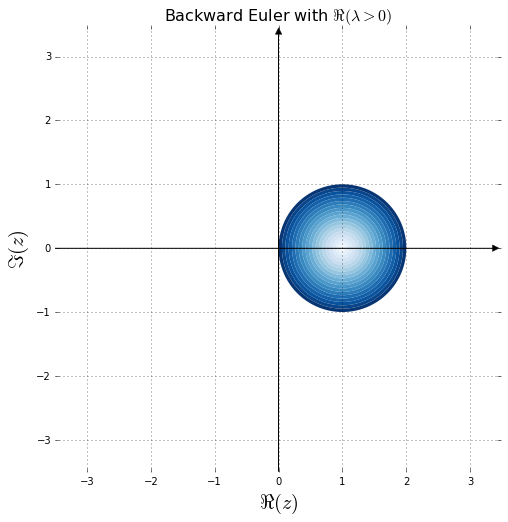

In [239]:
R = 1-Z
Rhat = np.abs(1-Z)
f, axarr = plt.subplots(1, 1, figsize=(8,8))
plot_complex_region(Rhat, axarr, "Backward Euler with $\Re(\lambda > 0)$", plt.cm.Blues)

5) Resuelva mediante algún método (FE, BE, RK4, etc.) el siguiente IVP:

$$u_t = t^2 + u^2,\quad\quad u(0) = 1 $$

### Apéndice
Por diversión, generando un plot un poco más familiar...

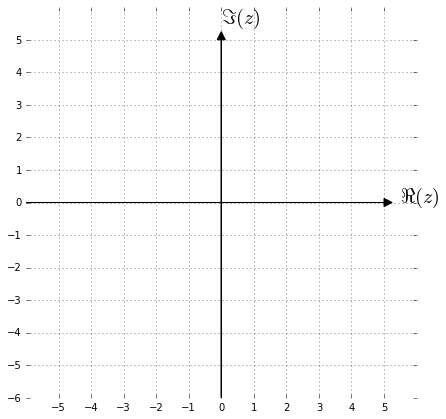

In [205]:
xx = np.linspace(-5, 5, 100)
plt.figure(figsize=(7,7))
#plt.axis("off")
plt.grid(True)
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.xticks(np.arange(-5,6,1))
plt.yticks(np.arange(-6,6,1))
plt.arrow(0, -6, 0, 11, head_width=0.25, head_length=0.25, fc='k', ec='k')
plt.arrow(-6, 0, 11, 0, head_width=0.25, head_length=0.25, fc='k', ec='k')
plt.text(5.5, 0, r"$\Re(z)$", fontsize=20)
plt.text(0, 5.5, r"$\Im(z)$", fontsize=20)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.savefig("plane.pdf")

### DISCLAIMER

El presente notebook ha sido creado para el curso ILI286 - Computación Científica 2, del Departamento de Informática, Universidad Técnica Federico Santa María.
El material ha sido creado por Alejandro Sazo (<asazo@alumnos.inf.utfsm.cl>), y es distribuido sin restricciones. En caso de encontrar un error, por favor no dude en contactar al email especificado.
Puede encontrar la última versión del código en <https://github.com/asazo/CC2>